In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')

In [23]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']

In [24]:
graph_name = [
    'ecology1'
    , 'nlpkkt160'
    , 'nlpkkt240'
    , 'G3_circuit'
    , 'NLR'
    , 'asia'
    , 'cage15'
    , 'coPapersCiteseer'
    , 'coPapersDBLP'
    , 'kkt_power'
    , 'uk-2002'
]
graph_list = [
    'input/ecology1'
    , 'input/nlpkkt160'
    , 'input/nlpkkt240'
    , 'input/G3'
    , 'input/NLR'
    , 'input/asia'
    , 'nput/cage15'
    , 'input/coPapersCiteseer'
    , 'input/coPapersDBLP'
    , 'input/kkt'
    , 'input/uk-2002'
]

In [28]:
procs = 961
SpMV_p2p = pd.read_csv('KNL_CSR_SpMV_on_MPI_Test.csv')
SpMV_p2p = SpMV_p2p[SpMV_p2p['nProcess'] == procs]
SpMV_comm = pd.read_csv('KNL_CSR_Comm_on_MPI.csv')
SpMV_comm = SpMV_comm[SpMV_comm['nProcess'] == procs]
SpMV_local_mult = pd.read_csv('KNL_CSR_Local_Matmul_on_MPI.csv')
SpMV_local_mult = SpMV_local_mult[SpMV_local_mult['nProcess'] == procs]
SpMV_p2p = SpMV_p2p.groupby('Name').mean()
SpMV_p2p = SpMV_p2p.reset_index()
SpMV_comm = SpMV_comm.groupby('Name').mean()
SpMV_comm = SpMV_comm.reset_index()
SpMV_local_mult = SpMV_local_mult.groupby('Name').mean()
SpMV_local_mult = SpMV_local_mult.reset_index()

for index,row in SpMV_p2p.iterrows():
    print(row['Name'], ' compare: ', row['AvgTime']/(SpMV_comm.iloc[index]['AvgTime'] + SpMV_local_mult.iloc[index]['AvgTime']))

333SP_961  compare:  2.0200391221420597
AS365_961  compare:  1.9652322170311993
G3_circuit_961  compare:  4.441610839009927
M6_961  compare:  2.0293663130943673
NLR_961  compare:  1.9294678340428628
af_shell10_961  compare:  1.9752033898305086
asia_961  compare:  2.1556835793791196
cage15_961  compare:  5.06978439835627
coPapersCiteseer_961  compare:  12.995525084964678
coPapersDBLP_961  compare:  26.72559744477983
copter2_961  compare:  52.84221128021486
ecology1_961  compare:  5.873861524871303
europe_961  compare:  1.8304428197508622
kkt_power_961  compare:  8.62017985345274
nlpkkt160_961  compare:  1.9989502612552044
nlpkkt200_961  compare:  1.686729525129305
nlpkkt240_961  compare:  1.5826198733748844
thermal2_961  compare:  3.2860797242209516
uk  compare:  4.905328911464674


In [29]:
SpMV_comm

,Name,MatrixSize,MaxRow,MinTime,MaxTime,AvgTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock,AvgCommunication,AvgInterProcessCall,SizeOfData,DiagonalElem,OffDiagonalElem,Bandwidth,InDiagonalBandwidth
0,333SP_961,3712815,3979,0.0,0.0,0.0,100,961,6.0,23883,46.192508,4.861602,8,22914,283,3121478,3968
1,AS365_961,3799275,4072,0.0,0.0,0.0,100,961,6.0,24431,42.876171,5.602497,8,22872,493,2458638,4068
2,G3_circuit_961,1585478,1699,0.0,0.0,0.0,100,961,3.0,6642,37.365245,6.380853,8,6062,259,1215684,1618
3,M6_961,3501776,3753,0.0,0.0,0.0,100,961,6.0,22518,42.665973,5.694069,8,21046,494,2477448,3748
4,NLR_961,4163763,4462,0.0,0.0,0.0,100,961,6.0,26774,46.175858,5.727367,8,25952,458,3111546,4456
5,af_shell10_961,1508065,1616,0.0,0.0,0.0,100,961,34.0,54944,66.808533,5.744017,8,50500,3900,1097034,340
6,asia_961,11950757,12809,0.0,0.0,0.0,100,961,2.0,36335,3.680541,4.151925,8,24740,13,5247150,12762
7,cage15_961,5154859,5525,0.0,0.0,0.0,100,961,37.0,205965,214.847034,59.157128,8,64296,15609,5105236,5505
8,coPapersCiteseer_961,434102,465,0.0,0.0,0.0,100,961,856.0,398195,8.177940,97.173777,8,12164,2384,433481,465
9,coPapersDBLP_961,540486,579,0.0,0.0,0.0,100,961,351.0,203437,7.396462,231.204995,8,23078,1901,540014,579


In [30]:
SpMV_local_mult

,Name,MatrixSize,MaxRow,MinTime,MaxTime,AvgTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock,AvgCommunication,AvgInterProcessCall,SizeOfData,DiagonalElem,OffDiagonalElem,Bandwidth,InDiagonalBandwidth
0,333SP_961,3712815,3979,0.155747,0.268397,0.204999,100,961,6.0,23883,46.192508,4.861602,8,22914,283,3121478,3968
1,AS365_961,3799275,4072,0.218617,0.279128,0.239302,100,961,6.0,24431,42.876171,5.602497,8,22872,493,2458638,4068
2,G3_circuit_961,1585478,1699,0.047892,0.059364,0.053289,100,961,3.0,6642,37.365245,6.380853,8,6062,259,1215684,1618
3,M6_961,3501776,3753,0.151951,0.242423,0.218720,100,961,6.0,22518,42.665973,5.694069,8,21046,494,2477448,3748
4,NLR_961,4163763,4462,0.180147,0.342595,0.261441,100,961,6.0,26774,46.175858,5.727367,8,25952,458,3111546,4456
5,af_shell10_961,1508065,1616,0.278629,0.363387,0.295000,100,961,34.0,54944,66.808533,5.744017,8,50500,3900,1097034,340
6,asia_961,11950757,12809,0.247140,0.494268,0.319385,100,961,2.0,36335,3.680541,4.151925,8,24740,13,5247150,12762
7,cage15_961,5154859,5525,0.361105,0.957621,0.580144,100,961,37.0,205965,214.847034,59.157128,8,64296,15609,5105236,5505
8,coPapersCiteseer_961,434102,465,0.040305,1.180691,0.153299,100,961,856.0,398195,8.177940,97.173777,8,12164,2384,433481,465
9,coPapersDBLP_961,540486,579,0.053288,0.824256,0.148089,100,961,351.0,203437,7.396462,231.204995,8,23078,1901,540014,579


,Name,MatrixSize,MaxRow,MinTime,MaxTime,AvgTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock,AvgCommunication,AvgInterProcessCall,SizeOfData,DiagonalElem,OffDiagonalElem,Bandwidth,InDiagonalBandwidth
6,asia_961,11950757,12809,0.0,0.0,0.0,100,961,2.0,36335,3.680541,4.151925,8,24740,13,5247150,12762
9,coPapersDBLP_961,540486,579,0.0,0.0,0.0,100,961,351.0,203437,7.396462,231.204995,8,23078,1901,540014,579
10,copter2_961,55476,59,0.0,0.0,0.0,100,961,14.0,852,7.708637,12.651405,8,536,201,49551,59
8,coPapersCiteseer_961,434102,465,0.0,0.0,0.0,100,961,856.0,398195,8.177940,97.173777,8,12164,2384,433481,465
12,europe_961,50912018,54517,0.0,0.0,0.0,100,961,2.0,145042,8.980229,5.444329,8,114024,79,28714635,54097
11,ecology1_961,1000000,1071,0.0,0.0,0.0,100,961,4.0,4284,23.338189,5.750260,8,4032,97,651363,113
17,thermal2_961,1227087,1315,0.0,0.0,0.0,100,961,6.0,7900,24.783559,5.667014,8,7370,244,1203814,1310
18,uk,18520486,19851,0.0,0.0,0.0,100,961,147.0,2849429,26.514048,544.341311,8,305564,19281,18520198,19846
13,kkt_power_961,2063494,2211,0.0,0.0,0.0,100,961,7.0,16882,27.241415,42.734651,8,11074,1744,1917987,1772
2,G3_circuit_961,1585478,1699,0.0,0.0,0.0,100,961,3.0,6642,37.365245,6.380853,8,6062,259,1215684,1618


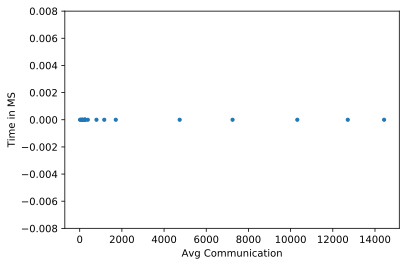

In [31]:
plt.scatter(SpMV_comm['AvgCommunication']*SpMV_comm['AvgInterProcessCall'], SpMV_comm['AvgTime'], s=10)
plt.xlabel('Avg Communication')
plt.ylabel('Time in MS')
SpMV_comm = SpMV_comm.sort_values(by=['AvgCommunication', 'NonZeroPerBlock', 'NonZeroPerRow'])
SpMV_comm

# Linear Model of SpMV Baseed on Non Zero Per Row and Block

Mean squared error: 0.76
R²: 0.55
intercept:  [0.54527592]
Coef:  [[-1.37339219e-03  1.51694176e-06]]
Linear Equation: y =  0.545275921124447  +  -0.0013733921882865417  * x


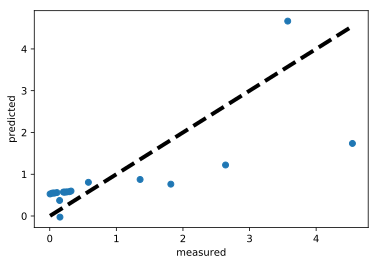

In [32]:
pdf = matplotlib.backends.backend_pdf.PdfPages("Non_Zero_Per_Row_and_Block_vs_Local_Matmul.pdf")
SpMV_local_mult = SpMV_local_mult.sort_values(by=['NonZeroPerBlock', 'NonZeroPerRow'])
y_test = SpMV_local_mult[['AvgTime']]
reg = LinearRegression()
reg.fit(SpMV_local_mult[['NonZeroPerRow','NonZeroPerBlock']], SpMV_local_mult[['AvgTime']])
y_predicted = reg.predict(SpMV_local_mult[['NonZeroPerRow','NonZeroPerBlock']])
print("Mean squared error: %.2f" % mean_squared_error(SpMV_local_mult[['AvgTime']], y_predicted))
print('R²: %.2f' % r2_score(SpMV_local_mult[['AvgTime']], y_predicted))
print('intercept: ', reg.intercept_)
print('Coef: ', reg.coef_)
print('Linear Equation: y = ', reg.intercept_[0], ' + ',  reg.coef_[0][0], ' * x')
fig, ax = plt.subplots()
ax.scatter(SpMV_local_mult[['AvgTime']], y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
# plt.show()
pdf.savefig(bbox_inches = 'tight')
pdf.close()

Mean squared error: 0.00
R²: 1.00
intercept:  [0.]
Coef:  [[0. 0. 0. 0.]]
Linear Equation of comm: y =  0.0  +  0.0  * x


Text(0,0.5,'predicted')

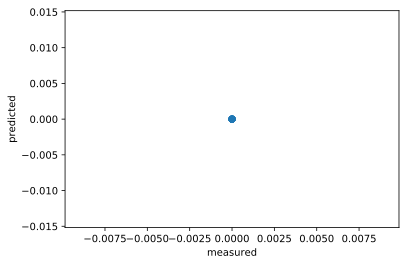

In [34]:
# pdf = matplotlib.backends.backend_pdf.PdfPages("AvgCommunication_AvgInterProcessCall_Bandwidth_and_OffDiagonalElem_vs_Global_Matmul.pdf")
SpMV_comm = SpMV_comm.sort_values(by=['AvgCommunication', 'AvgInterProcessCall', 'Bandwidth', 'OffDiagonalElem'])
y_test = SpMV_comm[['AvgTime']]
reg_comm = LinearRegression()
reg_comm.fit(SpMV_comm[['AvgCommunication','AvgInterProcessCall', 'Bandwidth', 'OffDiagonalElem']], SpMV_comm[['AvgTime']])
y_predicted = reg_comm.predict(SpMV_comm[['AvgCommunication','AvgInterProcessCall', 'Bandwidth', 'OffDiagonalElem']])
print("Mean squared error: %.2f" % mean_squared_error(SpMV_comm[['AvgTime']], y_predicted))
print('R²: %.2f' % r2_score(SpMV_comm[['AvgTime']], y_predicted))
print('intercept: ', reg_comm.intercept_)
print('Coef: ', reg_comm.coef_)
print('Linear Equation of comm: y = ', reg_comm.intercept_[0], ' + ',  reg_comm.coef_[0][0], ' * x')
fig, ax = plt.subplots()
ax.scatter(SpMV_comm[['AvgTime']], y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
# plt.show()
# pdf.savefig(bbox_inches = 'tight')
# pdf.close()

# Prediction

In [35]:
SpMV_p2p = pd.read_csv('CSR_SpMV_on_MPI.csv')
SpMV_p2p = SpMV_p2p[SpMV_p2p['Name'] == 'input/thermal2']
SpMV_p2p.head()
y_predicted_local_matmul = reg.predict(SpMV_p2p[['NonZeroPerRow','NonZeroPerBlock']])
y_predicted_comm = reg_comm.predict(SpMV_p2p[['AvgCommunication','AvgInterProcessCall', 'Bandwidth', 'OffDiagonalElem']])
print('Local mat mul: ', y_predicted_local_matmul + y_predicted_comm, ' actual: ', SpMV_p2p['AvgTime'])

Local mat mul:  [[0.62657154]]  actual:  165    1.079
Name: AvgTime, dtype: float64


In [96]:
df_row

,Name,MatrixSize,MaxRow,MinTime,MaxTime,AvgTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock,AvgCommunication,AvgInterProcessCall,SizeOfData,DiagonalElem,OffDiagonalElem,Bandwidth,InDiagonalBandwidth
6,input/ecology1,1000000,7850,0.593000,0.595733,0.594267,100,128,4.0,31400,70.234,5.312,8,30846,414,734402,281
0,input/G3,1585478,12697,0.944067,0.946733,0.945733,100,128,3.0,49345,124.484,5.094,8,47322,616,1237803,10539
10,input/thermal2,1227087,9847,1.078000,1.080000,1.079000,100,128,6.0,59024,74.641,5.000,8,56486,603,1023979,9772
7,input/kkt,2063494,16605,2.732533,2.740733,2.737933,100,128,6.0,114851,196.688,18.516,8,93508,6820,1950323,12959
1,input/NLR,4163763,33402,3.909600,3.912467,3.911133,100,128,6.0,200418,127.773,5.406,8,193582,1488,3383592,33394
2,input/asia,11950757,95360,6.612267,6.614667,6.613733,100,128,2.0,240251,4.141,4.156,8,189120,12,11014530,93705
5,input/coPapersDBLP,540486,4349,6.992467,7.001467,6.996733,100,128,128.0,543489,85.578,126.875,8,188288,28750,540472,4346
4,input/coPapersCiteseer,434102,3493,6.766667,6.773600,6.771267,100,128,260.0,908341,36.453,122.328,8,262434,28816,433661,3490
3,input/cage15,5154859,41482,18.064600,18.085867,18.075933,100,128,34.0,1435555,1357.195,37.312,8,602278,67195,5110871,41066
8,input/nlpkkt160,8345600,67159,15.680200,15.688400,15.684533,100,128,27.0,1813293,1503.312,10.469,8,1589682,73572,7500388,3758


input/ecology1  Local:  1.7246781390523296  Comm:  4.159683139025658
input/G3  Local:  1.8446155729221572  Comm:  4.187816433978898
input/thermal2  Local:  2.1315374971564967  Comm:  4.161968332414009
input/kkt  Local:  2.6006504046570367  Comm:  4.225269380073374
input/M6  Local:  3.4073350101489708  Comm:  4.186272972112803
input/333SP  Local:  3.525699776209042  Comm:  4.171561686105476
input/AS365  Local:  3.5741923186943354  Comm:  4.186382403816622
input/NLR  Local:  3.778621532497014  Comm:  4.189522249245068
input/asia  Local:  5.874046194863694  Comm:  4.125416031476642
input/coPapersDBLP  Local:  16.603138852669993  Comm:  4.167639738263016
input/europe  Local:  21.631316926791918  Comm:  4.132868280127406
input/coPapersCiteseer  Local:  31.561164924309004  Comm:  4.142167699735739
input/cage15  Local:  12.797091793306114  Comm:  4.82863944385899
input/nlpkkt160  Local:  15.09148456744092  Comm:  4.904795786386636
input/nlpkkt200  Local:  26.0026292217566  Comm:  5.3199259190

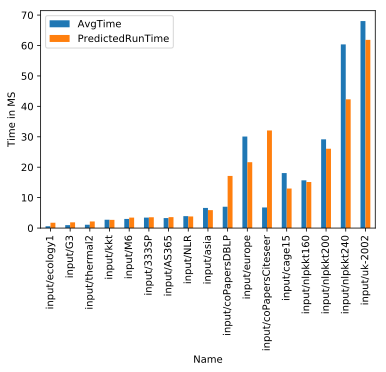

In [104]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_SpMV_based_on_Performance_Model.pdf")
# Linear Equation: y =  4.123269340662652  +  6.479938398441676e-05  * x  +  1.5327471334248416e-11  * x^2
SpMV_p2p = pd.read_csv('CSR_SpMV_on_MPI.csv')
SpMV_p2p_test = pd.read_csv('CSR_SpMV_on_MPI_Test.csv')
SpMVPredictor = pd.concat([SpMV_p2p, SpMV_p2p_test])
SpMVPredictor = SpMVPredictor.groupby('Name').mean()
SpMVPredictor = SpMVPredictor.reset_index()
SpMVPredictor = SpMVPredictor.sort_values(by=['NonZeroPerBlock', 'NonZeroPerRow'])
predictedRuntime = []
error = []
for index,row in SpMVPredictor.iterrows():
    T1 = (5.970439077936305 + (0.7157563117453349*row['NonZeroPerRow']))
    T2 = 1.110570674949308  + ( 5.5240516784695596e-05 * row['MatrixSize']/128)
    T3 = 1.110570674949308  + ( 5.5240516784695596e-05 * 122880)
    T0 = T1/T3*T2
    comm_data = row['AvgCommunication']*row['SizeOfData']
    comm_latency = 4.123269340662652  +  (6.479938398441676e-05  * comm_data) +  (1.5327471334248416e-11 * comm_data * comm_data)

    print(row['Name'], ' Local: ', T0, ' Comm: ', comm_latency)
    predicted_time = T0 + (row['AvgInterProcessCall'] * comm_latency/1000)
    error.append(predicted_time/row['AvgTime'])
    predictedRuntime.append(predicted_time)
    
    
SpMVPredictor['PredictedRunTime'] = predictedRuntime
SpMVPredictor['Error'] = error
ax = SpMVPredictor.plot(kind='bar', x='Name', y=['AvgTime', 'PredictedRunTime'])
ax.set_ylabel('Time in MS')
pdf.savefig(bbox_inches = 'tight')
pdf.close()
SpMVPredictor[['Name', 'AvgCommunication','AvgInterProcessCall', 'MaxRow', 'DiagonalElem', 'OffDiagonalElem', 'NonZeroPerRow','NonZeroPerBlock','AvgTime','PredictedRunTime', 'Error']].to_csv("CSR_SpMV_based_on_Performance_Model.csv")


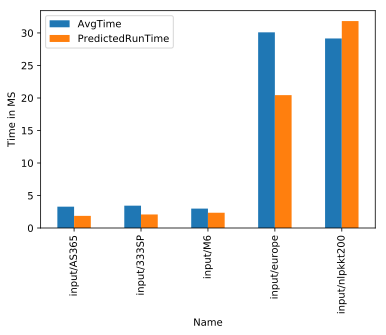

In [77]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_SpMV_based_on_Real_Data.pdf")
SpMV_p2p_test = pd.read_csv('CSR_SpMV_on_MPI_Test.csv')
y_predicted_local_matmul = reg.predict(SpMV_p2p_test[['NonZeroPerRow','NonZeroPerBlock']])
y_predicted_comm = reg_comm.predict(SpMV_p2p_test[['AvgCommunication','AvgInterProcessCall', 'Bandwidth', 'OffDiagonalElem']])
predict = y_predicted_local_matmul + y_predicted_comm
SpMV_p2p_test['PredictedRunTime'] = predict.flatten()
SpMV_p2p_test['Error'] = SpMV_p2p_test['AvgTime']/predict.flatten()
ax = SpMV_p2p_test.plot(kind='bar', x='Name', y=['AvgTime', 'PredictedRunTime'])
ax.set_ylabel('Time in MS')
pdf.savefig(bbox_inches = 'tight')
pdf.close()
SpMV_p2p_test[['Name', 'AvgCommunication','AvgInterProcessCall', 'MaxRow', 'DiagonalElem', 'OffDiagonalElem', 'NonZeroPerRow','NonZeroPerBlock','AvgTime','PredictedRunTime', 'Error']].to_csv("CSR_SpMV_based_on_Real_Data.csv")

In [73]:
from functools import reduce
predict.flatten()

array([1.86681605, 2.08472294])

Mean squared error: 97.98
R²: 0.94
intercept:  [-0.7711219]
Coef:  [[5.12894593e-05 8.21587072e-05]]
Linear Equation: y =  -0.7711218998562455  +  5.128945932690152e-05  * x
length:  19


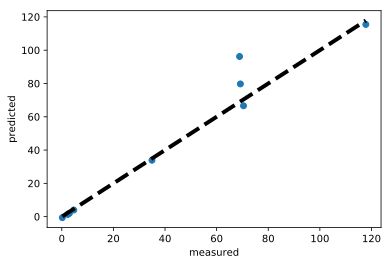

In [124]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_SpMV_on_Random_2D_Partition_Graph.pdf")
SpMV_Bcast_Random_2D_Partition = pd.read_csv('CSR_Random_BrCast_Reduce_SpMV.csv')
SpMV_Bcast_Random_2D_Partition = SpMV_Bcast_Random_2D_Partition.groupby('Name').mean()
SpMV_Bcast_Random_2D_Partition = SpMV_Bcast_Random_2D_Partition.reset_index()
SpMV_Bcast_train = SpMV_Bcast_Random_2D_Partition.iloc[:10,]
SpMV_Bcast = SpMV_Bcast.sort_values(by=['AvgTime'])
SpMV_Bcast = SpMV_Bcast.reset_index()
SpMV_Bcast_test = SpMV_Bcast_Random_2D_Partition.iloc[10:,]
SpMV_Bcast_test = SpMV_Bcast_test.sort_values(by=['AvgTime'])
SpMV_Bcast_test = SpMV_Bcast_test.reset_index()
y_test = SpMV_Bcast_test[['AvgTime']]
ln_reg = LinearRegression()
ln_reg.fit(SpMV_Bcast_train[['MaxRow','NonZeroPerBlock']], SpMV_Bcast_train[['AvgTime']])
y_predicted = ln_reg.predict(SpMV_Bcast_test[['MaxRow','NonZeroPerBlock']])
print("Mean squared error: %.2f" % mean_squared_error(SpMV_Bcast_test[['AvgTime']], y_predicted))
print('R²: %.2f' % r2_score(SpMV_Bcast_test[['AvgTime']], y_predicted))
print('intercept: ', ln_reg.intercept_)
print('Coef: ', ln_reg.coef_)
print('Linear Equation: y = ', ln_reg.intercept_[0], ' + ',  ln_reg.coef_[0][0], ' * x')
fig, ax = plt.subplots()
ax.scatter(SpMV_Bcast_test[['AvgTime']], y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
pdf.savefig(bbox_inches = 'tight')
pdf.close()
SpMV_Bcast_Random_2D_Partition = SpMV_Bcast_Random_2D_Partition.sort_values(by=['AvgTime'])
SpMV_Bcast_Random_2D_Partition = SpMV_Bcast_Random_2D_Partition.reset_index()
SpMV_Bcast_Random_2D_Partition[['Name', 'MatrixSize', 'MaxRow', 'MinTime', 'MaxTime', 'AvgTime', 'TotalRun', 'nProcess', 'NonZeroPerBlock']].to_csv("CSR_SpMV_on_Random_2D_Partition_Graph.csv")
print('length: ', len(SpMV_Bcast_Random_2D_Partition))

In [125]:
y_predicted

array([[ -0.60442969],
       [  1.32199562],
       [  2.02240863],
       [  3.97945815],
       [ 33.89333093],
       [ 96.22131224],
       [ 79.73035476],
       [ 66.59665005],
       [115.47864942]])

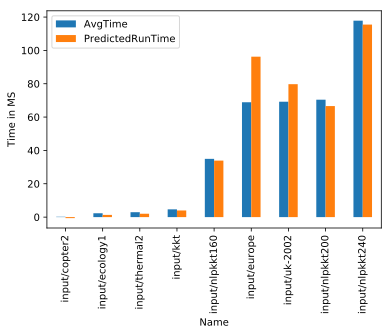

In [128]:
pdf = matplotlib.backends.backend_pdf.PdfPages("SpMV_Prediction_on_Random_2D_Partition_Graph.pdf")
SpMV_Bcast_test['PredictedRunTime'] = y_predicted.flatten()
SpMV_Bcast_test['Error'] = SpMV_Bcast_test['AvgTime']/y_predicted.flatten()
ax = SpMV_Bcast_test.plot(kind='bar', x='Name', y=['AvgTime', 'PredictedRunTime'])
ax.set_ylabel('Time in MS')
pdf.savefig(bbox_inches = 'tight')
pdf.close()
SpMV_Bcast_test[['Name', 'MatrixSize', 'MaxRow', 'MinTime', 'MaxTime', 'AvgTime', 'TotalRun', 'nProcess', 'NonZeroPerBlock','PredictedRunTime', 'Error']].to_csv("SpMV_Prediction_on_Random_2D_Partition_Graph.csv")
SpMV_Bcast_train[['Name', 'MatrixSize', 'MaxRow', 'MinTime', 'MaxTime', 'AvgTime', 'TotalRun', 'nProcess', 'NonZeroPerBlock']].to_csv("SpMV_Train_data_of_Random_2D_Partition_Graph.csv")

In [122]:
SpMV_Bcast_Random_2D_Partition.iloc[:5,]

,Name,MatrixSize,MaxRow,MinTime,MaxTime,AvgTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock
10,input/copter2,55476,1850,0.208,0.209,0.208,100,900,0.0,874
8,input/coPapersCiteseer,434102,14471,1.780,1.781,1.781,100,900,2.0,37960
9,input/coPapersDBLP,540486,18017,2.087,2.087,2.087,100,900,1.0,35098
11,input/ecology1,1000000,33334,2.307,2.308,2.307,100,900,0.0,4667
17,input/thermal2,1227087,40903,2.940,2.942,2.941,100,900,0.0,8467


In [109]:
SpMV_Bcast = pd.read_csv('CSR_Random_BrCast_Reduce_SpMV.csv')
SpMV_Bcast = SpMV_Bcast.groupby('Name').mean()
SpMV_Bcast = SpMV_Bcast.reset_index()
SpMV_Bcast = SpMV_Bcast.sort_values(by=['MaxRow', 'NonZeroPerBlock'])
# y_test = SpMV_local_mult[['AvgTime']]
# reg = LinearRegression()
# reg.fit(SpMV_local_mult[['NonZeroPerRow','NonZeroPerBlock']], SpMV_local_mult[['AvgTime']])
# y_predicted = reg.predict(SpMV_local_mult[['NonZeroPerRow','NonZeroPerBlock']])
# print("Mean squared error: %.2f" % mean_squared_error(SpMV_local_mult[['AvgTime']], y_predicted))
# print('R²: %.2f' % r2_score(SpMV_local_mult[['AvgTime']], y_predicted))
# print('intercept: ', reg.intercept_)
# print('Coef: ', reg.coef_)
# print('Linear Equation: y = ', reg.intercept_[0], ' + ',  reg.coef_[0][0], ' * x')
# fig, ax = plt.subplots()
# ax.scatter(SpMV_local_mult[['AvgTime']], y_predicted)
# ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
# ax.set_xlabel('measured')
# ax.set_ylabel('predicted')
SpMV_Bcast

,Name,MatrixSize,MaxRow,MinTime,MaxTime,AvgTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock
10,input/copter2,55476,1850,0.208,0.209,0.208,100,900,0.0,874
8,input/coPapersCiteseer,434102,14471,1.780,1.781,1.781,100,900,2.0,37960
9,input/coPapersDBLP,540486,18017,2.087,2.087,2.087,100,900,1.0,35098
11,input/ecology1,1000000,33334,2.307,2.308,2.307,100,900,0.0,4667
17,input/thermal2,1227087,40903,2.940,2.942,2.941,100,900,0.0,8467
5,input/af,1508065,50269,5.963,5.964,5.964,100,900,1.0,57594
2,input/G3,1585478,52850,3.369,3.370,3.369,100,900,0.0,6991
13,input/kkt,2063494,68784,4.650,4.651,4.651,100,900,0.0,14882
3,input/M6,3501776,116726,7.771,7.771,7.771,100,900,0.0,23844
0,input/333SP,3712815,123761,8.228,8.229,8.228,100,900,0.0,25092


<Figure size 504x432 with 0 Axes>

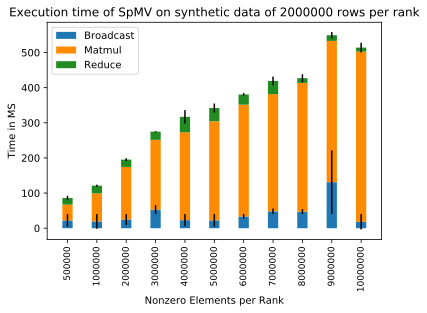

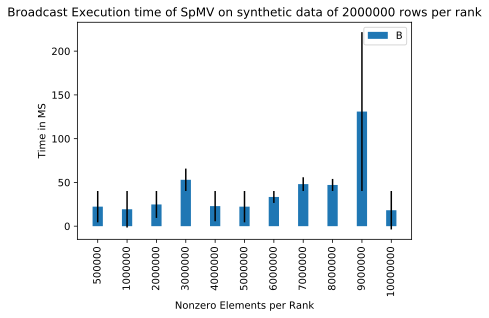

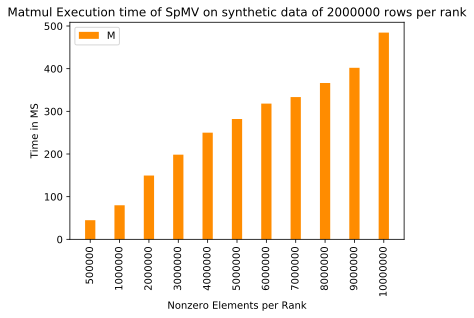

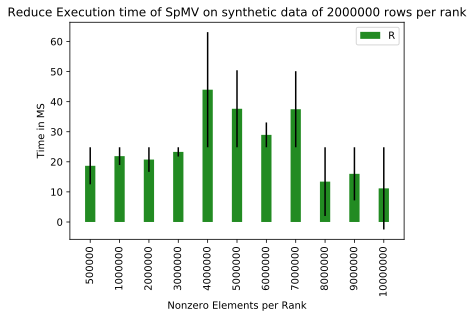

,index,MatrixSize,PartitionRow,MinTime,MaxTime,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock
69,66,3000000,2000000,86.029,86.030,86.029,22.311,44.942,18.671,100,900,0.25,500000
70,64,3000000,2000000,121.175,121.176,121.175,19.324,79.850,21.884,100,900,0.50,1000000
71,58,3000000,2000000,195.562,195.563,195.563,24.816,149.634,20.748,100,900,1.00,2000000
72,59,3000000,2000000,274.815,274.817,274.816,52.989,198.454,23.293,100,900,1.50,3000000
73,60,3000000,2000000,317.618,317.620,317.619,22.913,250.030,43.967,100,900,2.00,4000000
74,61,3000000,2000000,342.264,342.265,342.265,22.299,282.052,37.627,100,900,2.50,5000000
75,62,3000000,2000000,380.617,380.618,380.617,33.379,318.174,28.952,100,900,3.00,6000000
76,63,3000000,2000000,419.838,419.840,419.839,48.064,333.478,37.477,100,900,3.50,7000000
77,65,3000000,2000000,427.074,427.077,427.076,47.083,366.393,13.414,100,900,4.00,8000000
78,67,3000000,2000000,550.173,550.175,550.174,130.957,402.111,16.001,100,900,4.50,9000000


In [59]:
matrixRow = [122880, 500000, 1000000, 2000000]
matRow = matrixRow[3]
pdf = matplotlib.backends.backend_pdf.PdfPages("Stacked_bar_of_SpMV_Broadcast_Matmul_and_Reduce_on_" + str(matRow) + ".pdf")
data = pd.read_csv('CSR_SpMV_Model_of_Random_BrCast_Reduce.csv')
data = data.sort_values(by=['PartitionRow', 'NonZeroPerBlock'])
data = data.reset_index()
data_122880 = data[data['PartitionRow'] == matRow]

N = len(data_122880['AvgBcastTime'])
bcast_time = data_122880['AvgBcastTime'].tolist()
matmul_time = data_122880['AvgMatmulTime'].tolist()
reduce_time = data_122880['AvgReduceTime'].tolist()
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

bcast_std = np.subtract(bcast_time, np.mean(bcast_time))
matmul_std = np.subtract(matmul_time, np.mean(matmul_time))
reduce_std = np.subtract(reduce_time, np.mean(reduce_time))

plt.figure(figsize=(7,6))
f = plt.figure()
p1 = plt.bar(ind, bcast_time, width, yerr=bcast_std)
p2 = plt.bar(ind, matmul_time, width, bottom=bcast_time, color='darkorange')
p3 = plt.bar(ind, reduce_time, width, bottom=list(map(sum, zip(matmul_time, bcast_time))), color='forestgreen', yerr=reduce_std)

plt.xlabel('Nonzero Elements per Rank')
plt.ylabel('Time in MS')
plt.title('Execution time of SpMV on synthetic data of ' + str(matRow) + ' rows per rank')
plt.xticks(ind, data_122880['NonZeroPerBlock'].tolist(), rotation='vertical', fontsize=9)
plt.legend((p1[0], p2[0], p3[0]), ('Broadcast', 'Matmul', 'Reduce'))
plt.show()
pdf.savefig(f, bbox_inches = 'tight')

f = plt.figure()
p1 = plt.bar(ind, bcast_time, width, yerr=bcast_std)
plt.xlabel('Nonzero Elements per Rank')
plt.ylabel('Time in MS')
plt.title('Broadcast Execution time of SpMV on synthetic data of ' + str(matRow) + ' rows per rank')
plt.xticks(ind, data_122880['NonZeroPerBlock'].tolist(), rotation='vertical')
plt.legend("Broadcast")
plt.show()
pdf.savefig(f, bbox_inches = 'tight')

f = plt.figure()
p2 = plt.bar(ind, matmul_time, width, color='darkorange')
plt.xlabel('Nonzero Elements per Rank')
plt.ylabel('Time in MS')
plt.title('Matmul Execution time of SpMV on synthetic data of ' + str(matRow) + ' rows per rank')
plt.xticks(ind, data_122880['NonZeroPerBlock'].tolist(), rotation='vertical')
plt.legend("Matmul")
plt.show()
pdf.savefig(f, bbox_inches = 'tight')

f = plt.figure()
p3 = plt.bar(ind, reduce_time, width, color='forestgreen', yerr=reduce_std)
plt.xlabel('Nonzero Elements per Rank')
plt.ylabel('Time in MS')
plt.title('Reduce Execution time of SpMV on synthetic data of ' + str(matRow) + ' rows per rank')
plt.xticks(ind, data_122880['NonZeroPerBlock'].tolist(), rotation='vertical')
plt.legend("Reduce")
plt.show()
pdf.savefig(f, bbox_inches = 'tight')

pdf.close()

data_122880

In [205]:
matmul_std

array([-5.31566667, -4.42266667, -3.28666667, -2.28966667,  0.76533333,
        1.28033333,  1.65633333,  1.72933333,  1.94733333,  2.26333333,
        2.51533333,  3.15733333])

In [21]:
spmv_2d_data


,Name,MatrixSize,AvgRow,MinTime,MaxTime,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,TotalRun,nProcess,NonZeroPerRow,AvgNonZeroPerBlock,MaxNonZeroPerBlock
0,copter2_random_961,55476,1790,0.135806,0.153282,0.142807,0.065581,0.029015,0.049862,100,961,0.460335,733.0,824
1,coPapersCiteseer_random_961,434102,14004,1.235741,1.615052,1.411027,0.502980,0.725506,0.322454,100,961,2.507712,33375.0,35118
2,coPapersDBLP_random_961,540486,17436,1.573058,2.114494,1.802942,0.550102,0.821705,0.458602,100,961,1.875660,31728.0,32704
3,ecology1_random_961,1000000,32259,1.182659,2.162029,1.807997,0.600863,0.308092,1.016665,100,961,0.134350,4158.0,4334
4,thermal2_random_961,1227087,39584,1.615642,2.519367,2.203895,0.787602,0.564086,1.135682,100,961,0.200409,7650.0,7933
5,af_shell10_random_961,1508065,48648,3.216149,4.646490,3.859243,0.933208,2.012461,1.386735,100,961,1.115770,53240.0,54280
6,G3_circuit_random_961,1585478,51145,2.089707,3.117436,2.675123,1.031947,0.702981,1.237560,100,961,0.128185,6321.0,6556
7,kkt_power_random_961,2063494,66565,2.910504,3.922070,3.486577,1.199384,1.411792,1.254966,100,961,0.209645,13490.0,13955
8,M6_random_961,3501776,112961,4.999853,6.155351,5.636403,1.570094,2.995837,1.371067,100,961,0.197263,21856.0,22283
9,333SP_random_961,3712815,119769,5.273457,6.306079,5.929494,1.633773,3.243145,1.353134,100,961,0.197079,23118.0,23604


In [20]:

spmv_1d_data

,Name,MatrixSize,MaxRow,MinTime,MaxTime,AvgTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock,AvgCommunication,AvgInterProcessCall,SizeOfData,DiagonalElem,OffDiagonalElem,Bandwidth,InDiagonalBandwidth
0,copter2_961,55476,59,0.100939,0.431007,0.236099,100,961,14.0,852,7.708637,12.651405,8,536,201,49551,59
1,coPapersCiteseer_961,434102,465,0.485853,6.049049,1.992201,100,961,856.0,398195,8.177940,97.173777,8,12164,2384,433481,465
2,coPapersDBLP_961,540486,579,1.927568,8.745691,3.957767,100,961,351.0,203437,7.396462,231.204995,8,23078,1901,540014,579
3,ecology1_961,1000000,1071,0.118232,0.256430,0.192833,100,961,4.0,4284,23.338189,5.750260,8,4032,97,651363,113
4,thermal2_961,1227087,1315,0.163246,0.310794,0.240219,100,961,6.0,7900,24.783559,5.667014,8,7370,244,1203814,1310
5,af_shell10_961,1508065,1616,0.414874,0.686328,0.582685,100,961,34.0,54944,66.808533,5.744017,8,50500,3900,1097034,340
6,G3_circuit_961,1585478,1699,0.149092,0.329172,0.236689,100,961,3.0,6642,37.365245,6.380853,8,6062,259,1215684,1618
7,kkt_power_961,2063494,2211,0.392701,2.029442,0.931738,100,961,7.0,16882,27.241415,42.734651,8,11074,1744,1917987,1772
8,M6_961,3501776,3753,0.283814,0.561399,0.443863,100,961,6.0,22518,42.665973,5.694069,8,21046,494,2477448,3748
9,333SP_961,3712815,3979,0.287309,0.597625,0.414106,100,961,6.0,23883,46.192508,4.861602,8,22914,283,3121478,3968


<Figure size 432x288 with 0 Axes>

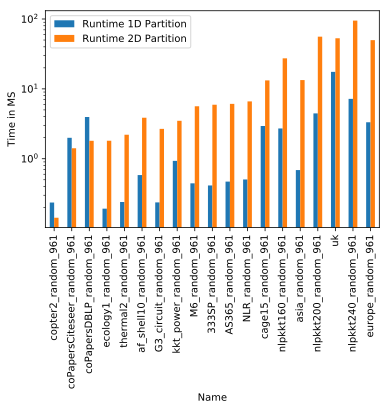

/home/maruf/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


<Figure size 1440x288 with 0 Axes>

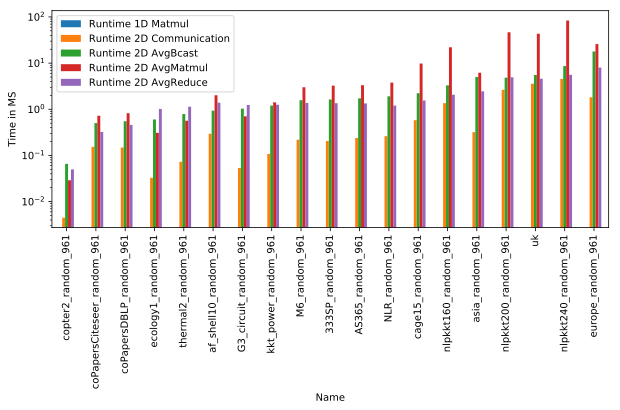

<Figure size 432x288 with 0 Axes>

In [19]:
procs = 961
spmv_2d_data = pd.read_csv('KNL_CSR_Random_BrCast_Reduce_SpMV.csv')
spmv_2d_data = spmv_2d_data[spmv_2d_data['nProcess'] == procs]
spmv_2d_data = spmv_2d_data.groupby('Name').mean()
spmv_2d_data = spmv_2d_data.sort_values(by=['AvgRow', 'AvgNonZeroPerBlock'])
spmv_2d_data = spmv_2d_data.reset_index()
spmv_1d_data = pd.read_csv('KNL_CSR_SpMV_on_MPI_Test.csv')
spmv_1d_data = spmv_1d_data[spmv_1d_data['nProcess'] == procs]
spmv_1d_data = spmv_1d_data.groupby('Name').mean()
spmv_1d_data = spmv_1d_data.sort_values(by=['MaxRow', 'NonZeroPerBlock'])
spmv_1d_data = spmv_1d_data.reset_index()


spmv_1d_matmul_data = pd.read_csv('KNL_CSR_Comm_on_MPI.csv')
spmv_1d_matmul_data = spmv_1d_matmul_data[spmv_1d_matmul_data['nProcess'] == procs]
spmv_1d_matmul_data = spmv_1d_matmul_data.groupby('Name').mean()
spmv_1d_matmul_data = spmv_1d_matmul_data.sort_values(by=['MaxRow', 'NonZeroPerBlock'])
spmv_1d_matmul_data = spmv_1d_matmul_data.reset_index()


spmv_1d__comm_data = pd.read_csv('KNL_CSR_Local_Matmul_on_MPI.csv')
spmv_1d__comm_data = spmv_1d__comm_data[spmv_1d__comm_data['nProcess'] == procs]
spmv_1d__comm_data = spmv_1d__comm_data.groupby('Name').mean()
spmv_1d__comm_data = spmv_1d__comm_data.sort_values(by=['MaxRow', 'NonZeroPerBlock'])
spmv_1d__comm_data = spmv_1d__comm_data.reset_index()

compare_1d_2d_part = pd.DataFrame()
compare_1d_2d_part['Name'] = spmv_2d_data['Name'].tolist()
compare_1d_2d_part['Runtime 1D Partition'] = spmv_1d_data['AvgTime'].tolist()
compare_1d_2d_part['Runtime 2D Partition'] = spmv_2d_data['AvgTime'].tolist()
compare_1d_2d_part['Speedup'] = (spmv_2d_data['AvgTime']/spmv_1d_data['AvgTime']).tolist()

pdf = matplotlib.backends.backend_pdf.PdfPages("KNL_SpMV_Comparison_1D_vs_2D.pdf")
f = plt.figure()
ax = compare_1d_2d_part.plot(kind='bar', x='Name', y=['Runtime 1D Partition', 'Runtime 2D Partition'], logy=True)
ax.set_ylabel('Time in MS')
plt.show()
pdf.savefig(f, bbox_inches = 'tight')

f = plt.figure(figsize=(20,4))
compare_comm_1d_2d_part = pd.DataFrame()
compare_comm_1d_2d_part['Name'] = spmv_2d_data['Name'].tolist()
compare_comm_1d_2d_part['Runtime 1D Matmul'] = spmv_1d_matmul_data['AvgTime'].tolist()
compare_comm_1d_2d_part['Runtime 2D Communication'] = spmv_1d__comm_data['AvgTime'].tolist()
compare_comm_1d_2d_part['Runtime 2D AvgBcast'] = spmv_2d_data['AvgBcastTime'].tolist()
compare_comm_1d_2d_part['Runtime 2D AvgMatmul'] = spmv_2d_data['AvgMatmulTime'].tolist()
compare_comm_1d_2d_part['Runtime 2D AvgReduce'] = spmv_2d_data['AvgReduceTime'].tolist()
ax = compare_comm_1d_2d_part.plot(kind='bar', figsize=(10,4), x='Name', y=['Runtime 1D Matmul', 'Runtime 2D Communication', 'Runtime 2D AvgBcast', 'Runtime 2D AvgMatmul', 'Runtime 2D AvgReduce'], logy=True)
ax.set_ylabel('Time in MS')
plt.show()
pdf.savefig(f, bbox_inches = 'tight')

f = plt.figure()
pdf.close()
compare_1d_2d_part.to_csv('SpMV_Comparison_1D_vs_2D.csv')

19